<h1><center>Introduction to Computational Neuroscience</center></h1> 


<h1><center>Practice Session III: Machine Learning</center></h1>
<center>Aqeel Labash, Daniel Majoral, Raul Vicente</center>

My Student ID is: <font color='green'>[YOUR ANSWER]</font> and it took me approximately: <font color='green'>[YOUR ANSWER]</font> hours to complete the home work.

The data of how long it took you to complete the home work will help us to improve the home works to be balanced.

**Before** you start you need to install an extra library. 

After you activate your conda environment `activate Py3_ICNS` or `source activate Py3_ICNS` execute `conda install scikit-learn`

<p>The main purpose of the fields of neural encoding and neural decoding is to learn the relation
between a stimulus and the neural response elicited by this stimulus. When studying encoding
we want to predict how the brain would respond given a certain stimulus, we estimate the
probability p(brainresponse|stimulus). In neural decoding we do the inverse - we read the brain
activity using imaging techniques - and ask the question ”which stimulus caused this activity?”,
we look for p(stimulus|brainresponse).</p>

<p>In a decoding paradigm we present the test subjects with different stimuli while at the same
time recording responses on their brains. The task is to create a model, which takes any piece of
the recorded brain data as an input and predicts which stimulus was responsible for producing
this piece of data.</p>

<p>In the last practice session we kind of manually created one such model: by looking at
the firings of 72 neurons we might pretty accurately guess the orientation of the bar on the
screen. We would be able to predict which stimulus was shown, given the neural responses.</p>

<p>Nevertheless, very often the data can be too massive or too complex to find such direct relation
between activity and stimulus by simple observation. That’s where machine learning comes to
our aid.</p>

<p>The main goal of machine learning can be summarized as providing an automatic way of
finding the dependencies between a set of features (neural data) and the corresponding labels
(the stimuli).</p>

Before we continue let us go through vocabulary:
+ A dataset is a structure which contains all the data we have.
+ A dataset consist of instances, often also referred to as data points.
+ In case of classification, instances consist of features and a class label.
+ Features are parameters, which describe our data. For example the average spiking rate
of a neuron might be a feature, the power of EEG in a certain frequency band might be
a feature, etc. Each instance has its own values for each of the features.
+ All feature values of an instance put together form a feature vector.
+ Feature vector is a representation of the instance in the feature space.
+ Each instance belongs to a certain class - the name/ID number of stimulus that caused
the features.
+ The goal of a machine learning algorithm is to create a model, which can guess the class
(classify) of the instance given only its feature vector. A good model should be able to
1
do this also on previously unseen feature vectors (generalize).
+ The model is created from examples. Those are instances for which the class is known. A
set of such examples is called training set, because we train our model on it.
+ Test set is another set of instances, for which we also know the true class, but we do not
share this knowledge with the model. Instead we ask the model to guess the class of each
instance.
+ We can then see how many instances from the test set model has identified correctly and
the rate:  

<center> $ \dfrac{Number\ of\ correctly\ classified\ instances}{Total\ number\ of\ instances} $   </center> 

is called accuracy and it is used to evaluate model’s performance.

## Exercise 1.1: Where is the rat? (2.5pt)


In this task we will try to predict in which part of space a rat is located based on its neural
activity. When collecting the data some electrodes were inserted to the rat’s hippocampus
where neurons responsible for navigation are located. At the same time the location of the rat
was tracked by a camera. We have preprocessed the data so that:
- 1. Features are spike counts in different neurons during a 500ms interval
- 2. Class corresponds to which of the 16 areas the rat was located during these 500ms
- 3. Your goal is to create a model that predicts the area based on the neural activity.


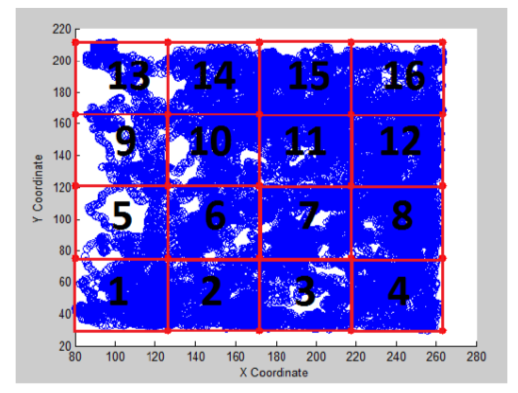 <center> Figure 1: Find in which zone the rat is! </center>



In the data folder you find the following files:
   1. spikes `spike_counts.txt` - count of spikes form 71 neuron at each timestep
   2. blocks `location_areas.txt` - region where the rat is at each timestep

1. Read in the data and make sure you understand what is what.

In [4]:
# Your code

2. Randomly divide the instances into training and test sets, so that 80 percent of the data is in training set (You can use `sklearn.model_selection.train_test_split` from scikit-learn library).

In [ ]:
# Your code

3. Use LDA (linear discriminant analysis) as the classifier (you can use `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` from `scikit-learn` library).

In [ ]:
# Your code

4. Learn a model using the examples in the training set. Predict the locations for instances
in test set and compare them with the true locations.


In [ ]:
# Your code

5. How much is the overall accuracy in the test set? How much is the precision for each class
separately (return 16 values)?
precision of class i =
points in zone i correctly classif ied as i
total number of points classif ied as in zone i

**HINT**: class accuracies can be calculated by dividing the diagonal values of confusion
matrix with the column sums.


In [ ]:
# Your code

6) Draw a confusion matrix. What additional information (beyond class accuracies) does this matrix
provide? (you can use `sklearn.metrics.confusion_matrix`)

You need to produce a confusion matrix, but it does not need to be a nice colourful drawing. It can also be just a readable (!!) printout of the matrix.


In [ ]:
# Your code

##  Exercise 1.2: A few questions to keep in mind (1.5pt) (answer in more than 1 phrase)

Q1 : Why do you need to separate training and test datasets, that is why can’t you evaluate
your model on the training set? What does it mean if you accuracies on training set and test
set are very different?

<font color=green>Your Answer</font>

Q2 : If our model would just predict class labels completely randomly, what would be the
average prediction accuracy?

<font color=green>Your Answer</font>

Q3 : If our model would always predict the class label that is the most common label in our
dataset, what would the average accuracy be?

<font color=green>Your Answer</font>

## Exercise 2: Which picture was shown? (2pt)


In this exercise we will work with fMRI dataset3 by Haxby et al.4. As you may recall, fMRI measures the
blood oxygen level in the brain with high spatial precision. The data was recorded while test subject was
presented with images from 9 categories:  

(1) house     
(2) scrambled   
(3) cat   
(4) shoe   
(5) bottle   
(6) scissors   
(7) chair   
(8) face   
(9) something else.  

You can see them (except for the “something else” category) on the Figure: 

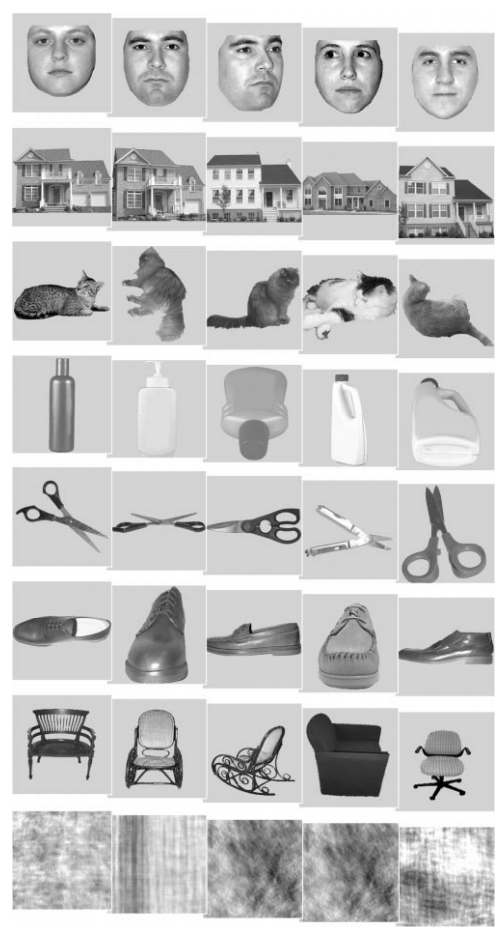 <center> Figure 2: Examples of stimuli. </center>

The data we have is already preprocessed ([1](https://openfmri.org/dataset/ds000105)), so instead of ≈25000 voxels in the whole brain we only
use 577 voxels from relevant brain areas. In machine learning terminology this means that each instance has
577 features and belongs to one of the 9 classes. You will find the feature data in `data/voxels.txt` and class
information `data/labels.txt`. First one is 1452×577 matrix (1452 instances 577 features each) and the second
one is a vector of length 1452 (each instance has a class). The question we want to answer is: Is it possible to
decode from the fMRI signal the image the test subject was looking at ?. Your task will once again b to build a predictive model.
Perform the following steps and report the results:

1. Load the data. (Look at it. Always look at the data)
2. Split data into training and test set. We want to have enough instances of each class in
the test set to calculate meaningful statistics, so this time take 80 % instances for
training set).

In [ ]:
# Your code

3. Train a LDA (Linear Discriminant Analysis) model on this data.

In [2]:
# Your code

4. Use training set to train a model. With the model predict the classes of the test set.

In [ ]:
# Your code

5. For each class calculate the precision on test set. Which class of images was the easiest
to predict based on fMRI data? Which one was the hardest?

In [ ]:
# Your code

*** 
# <center> End of obligatory exercises </center>  
***

## Exercise 3: Precision, Recall, F1-score (Bonus 1pt)

Sometimes accuracy can fail us if we are dealing with unbalanced datasets. If we classify images
of cats and dogs and in out test set we have 90 % of cats, it is possible to achieve accuracy of 0.9
by simply always answering ”cat”. One possible countermeasure is to look not at the accuracy
of the model, but at its *precision* and *recall*.

Imagine you have 2 classes: ”cat” and ”dog”. Precision is calculated for each class separately
and shows how many of the instances the model has identified as cats are really cats. For example
if out of 10 instances classified as ”cats” two turn out to be ”dogs” we say that precision is 0.8.
Recall is also calculated separately for each class. It shows how many of all cats present in
the test set your model correctly identified as such. For example if there were 100 cats and 100
dogs and our model correctly classified only 78 cats (other 22 it guessed as dogs) we say that its recall is 0.78.
F1 score is a convenient metric to write precision and recall as one number:  

<center> $F1 = \dfrac{2 ·precision · recall}{precision + recall}$ </center>

Your task is to calculate precision, recall and f1-score for each of 9 classes.

In [ ]:
# Your code